# Tensorflow Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

y = mx + b  
b = 5

In [5]:
y_true = (0.5 * x_data) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [7]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [8]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [9]:
y_df.head()

,Y
0,7.450589
1,3.940089
2,3.309442
3,5.659571
4,3.802328


In [10]:
my_data = pd.concat([x_df, y_df], axis=1)

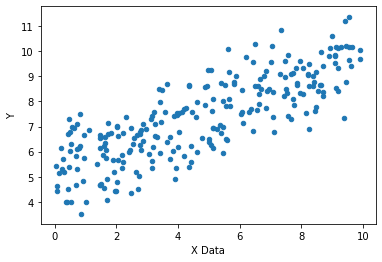

In [11]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [12]:
batch_size = 8

In [13]:
np.random.randn(2)

array([1.69390355, 2.46484045])

In [14]:
m = tf.Variable(0.64)
b = tf.Variable(0.51)

In [15]:
xph = tf.placeholder(tf.float32, [batch_size])

In [16]:
yph = tf.placeholder(tf.float32, [batch_size])

In [17]:
y_model = m * xph + b

In [18]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m, b])

In [22]:
y_hat = x_data * model_m + model_b

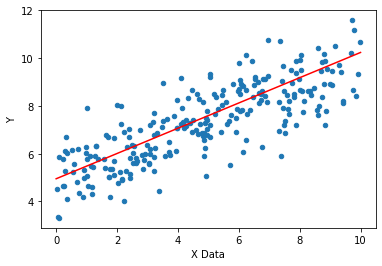

In [23]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

# TF ESTIMATOR

In [24]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [25]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

W0904 16:22:51.149191 15772 estimator.py:1811] Using temporary folder as model directory: C:\Users\haruk\AppData\Local\Temp\tmphf2jrg50


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)


In [28]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=None, 
                                                shuffle=True)

In [29]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, 
                                                batch_size=8, num_epochs=1000, 
                                                shuffle=False)

In [30]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, 
                                                batch_size=8, num_epochs=1000, 
                                                shuffle=False)

In [31]:
# estimator.train(input_fn=input_func, steps=1000)

In [32]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

W0904 16:22:51.479307 15772 deprecation.py:323] From C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0904 16:22:51.480304 15772 deprecation.py:323] From C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0904 16:22:51.679770 15772 deprecation.py:323] From C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:308: to_float (from tensorflow.python.ops.mat

InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMV launch failed:  m=1, n=8
	 [[node linear/linear_model/linear_model/linear_model/x/weighted_sum (defined at C:\Users\haruk\AppData\Local\Temp\tmphz50h5qn.py:35) ]]
	 [[linear/prediction/mean/broadcast_weights_1/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/concat/_49]]
  (1) Internal: Blas GEMV launch failed:  m=1, n=8
	 [[node linear/linear_model/linear_model/linear_model/x/weighted_sum (defined at C:\Users\haruk\AppData\Local\Temp\tmphz50h5qn.py:35) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'linear/linear_model/linear_model/linear_model/x/weighted_sum':
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\kernelbase.py", line 378, in dispatch_queue
    yield self.process_one()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 714, in __init__
    self.run()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-8b654f3f8dca>", line 1, in <module>
    train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 477, in evaluate
    name=name)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 519, in _actual_eval
    return _evaluate()
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 501, in _evaluate
    self._evaluate_build_graph(input_fn, hooks, checkpoint_path))
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1501, in _evaluate_build_graph
    self._call_model_fn_eval(input_fn, self.config))
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1537, in _call_model_fn_eval
    features, labels, ModeKeys.EVAL, config)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1146, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py", line 1393, in _model_fn
    sparse_combiner=sparse_combiner)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py", line 744, in _linear_model_fn
    logits = logit_fn(features=features)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py", line 423, in linear_logit_fn
    logits = linear_model(features)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 634, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 146, in wrapper
    ), args, kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 450, in converted_call
    result = converted_f(*effective_args, **kwargs)
  File "C:\Users\haruk\AppData\Local\Temp\tmp56s1i5ih.py", line 28, in tf__call
    retval_ = ag__.converted_call('layer', self, ag__.ConversionOptions(recursive=True, force_conversion=False, optional_features=(), internal_convert_user_code=True), (features,), None)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 356, in converted_call
    return _call_unconverted(f, args, kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 255, in _call_unconverted
    return f(*args)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 634, in __call__
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 146, in wrapper
    ), args, kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 450, in converted_call
    result = converted_f(*effective_args, **kwargs)
  File "C:\Users\haruk\AppData\Local\Temp\tmphz50h5qn.py", line 38, in tf__call
    ag__.for_stmt(self._feature_columns, None, loop_body, ())
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\operators\control_flow.py", line 110, in for_stmt
    return _py_for_stmt(iter_, extra_test, body, init_state)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\operators\control_flow.py", line 119, in _py_for_stmt
    state = body(target, *state)
  File "C:\Users\haruk\AppData\Local\Temp\tmphz50h5qn.py", line 35, in loop_body
    weighted_sum = ag__.converted_call(_create_weighted_sum, None, ag__.ConversionOptions(recursive=True, force_conversion=False, optional_features=(), internal_convert_user_code=True), (), {'column': column, 'transformation_cache': transformation_cache, 'state_manager': self._state_manager, 'sparse_combiner': self._sparse_combiner, 'weight_var': weight_var})
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 356, in converted_call
    return _call_unconverted(f, args, kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 253, in _call_unconverted
    return f(*args, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\feature_column\feature_column_v2.py", line 2365, in _create_weighted_sum
    weight_var=weight_var)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\feature_column\feature_column_v2.py", line 2375, in _create_dense_column_weighted_sum
    return math_ops.matmul(tensor, weight_var, name='weighted_sum')
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\ops\math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 5925, in mat_mul
    name=name)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\haruk\Anaconda3\envs\ai-gpu\Lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
